# Assignment 2
## Q1. Three-Variable Boolean Function Learning using a Neural Network

Designing a simple neural network from scratch (without using any external libraries) to learn a Boolean function with three variables. The steps are:

1. **Input**: Defining three Boolean variables.
2. **Generating Data**: Creating training examples for the Boolean functions.
3. **Model Training**: Building and training a neural network to learn the functions.
4. **Verification**: Testing the network on five separate Boolean functions and verifying the results.

Observing behavior of the network using a custom implementation of gradient descent.

---

### **Step 1: Defining Activation Functions**

This step involves importing the required libraries and defining the activation functions, such as the sigmoid function, its derivative, and a binary threshold activation function. These functions will be used everytime for training and prediction phases of our neural network.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function for forward propagation
def apply_sigmoid(val):
    return 1 / (1 + np.exp(-val))

# Derivative of the sigmoid function (used during backpropagation)
def sigmoid_derivative(output):
    return output * (1 - output)

# Custom binary activation function (0 or 1 based on threshold)
def binary_threshold_activation(val):
    return 1 if val > 0.5 else 0


### **Step 2: Neural Network Initialization and Training**

We will give random weights between the input layer and the hidden layer, as well as between the hidden layer and the output. The training process will use **backpropagation** and **gradient descent** to minimize the error between predicted and actual values.

The neural network has:
- 3 input neurons for each Boolean variable.
- A hidden layer with 4 neurons.
- 1 output neuron for the Boolean function result.


In [29]:
# Prepare the input-output dataset for the Boolean function
def prepare_dataset(bool_fn):
    inputs = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                       [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

    # Apply the Boolean function to the inputs to produce outputs
    outputs = np.array([bool_fn(*inp) for inp in inputs])

    return inputs, outputs.reshape(-1, 1)  # Reshape for consistency in matrix operations

# Function to plot the error over training epochs
def visualize_training_errors(errors_list):
    plt.plot(errors_list, label="Training Error")
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.title('Training Error Progression')
    plt.legend()
    plt.show()

# Train the neural network model
def execute_training(X, y, max_epochs=10000, lr=0.1):
    np.random.seed(123)  # Set random seed for reproducibility

    # Randomly initialize weights for both input-to-hidden and hidden-to-output layers
    w_input_hidden = np.random.rand(3, 4)  # 3 input features, 4 neurons in the hidden layer
    w_hidden_output = np.random.rand(4, 1)  # 4 hidden neurons, 1 output

    error_list = []  # Store errors per epoch for plotting

    for epoch in range(max_epochs):
        # Forward pass: compute hidden layer output
        hidden_output = apply_sigmoid(np.dot(X, w_input_hidden))

        # Forward pass: compute final output
        final_pred = apply_sigmoid(np.dot(hidden_output, w_hidden_output))

        # Calculate error (difference between actual and predicted)
        error = y - final_pred

        # Store the mean error for this epoch
        error_list.append(np.mean(np.abs(error)))

        # Backpropagation: compute error gradient for output layer
        output_delta = error * sigmoid_derivative(final_pred)

        # Backpropagation: compute error gradient for hidden layer
        hidden_error = output_delta.dot(w_hidden_output.T) * sigmoid_derivative(hidden_output)

        # Update weights (hidden to output) using the learning rate
        w_hidden_output += hidden_output.T.dot(output_delta) * lr

        # Update weights (input to hidden)
        w_input_hidden += X.T.dot(hidden_error) * lr

    # After training, plot the error progression
    visualize_training_errors(error_list)

    return w_input_hidden, w_hidden_output


### **Step 3: Prediction Function**

After training the neural network, we will use the weights to perform **forward propagation** and predict the outputs for the given Boolean function. The outputs are converted to binary values using a step function to match the expected binary output (0 or 1).


In [30]:
# Function to make predictions using the trained neural network
def make_nn_predictions(X, w_input_hidden, w_hidden_output):
    # Hidden layer computations
    hidden_layer_out = apply_sigmoid(np.dot(X, w_input_hidden))

    # Output layer computations
    final_output = apply_sigmoid(np.dot(hidden_layer_out, w_hidden_output))

    # Convert predictions to binary (0 or 1)
    return np.vectorize(binary_threshold_activation)(final_output)


### **Step 4: Boolean Functions**

Here, we will define five distinct Boolean functions to test the neural network. Each function takes three inputs (`a`, `b`, `c`) and returns a Boolean value based on logical operations like AND, OR, and NOT.


In [31]:
# Various three-variable Boolean functions
def bool_function_a(a, b, c):
    return a or b or c

def bool_function_b(a, b, c):
    return a and b or c

def bool_function_c(a, b, c):
    return not (a or b or c)

def bool_function_d(a, b, c):
    return a and b and c

def bool_function_e(a, b, c):
    return not (a and b and c)


### **Step 5: Training and Verification**

We will train the neural network on the generated data for each Boolean function and verify the network so that it correctly predict the outputs. After training, the predicted outputs will be compared to the actual outputs.

For each Boolean function, the network goes through:
1. **Training**: Using the training examples to adjust the weights.
2. **Prediction**: Testing the model on the same data.
3. **Verification**: Comparing the predicted results with the actual Boolean function outputs.



Now training on Boolean function 1: bool_function_b


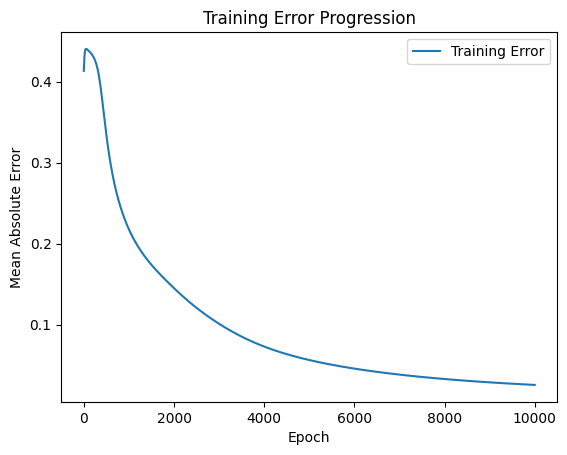

Predicted Outputs:  [0 1 0 1 0 1 1 1]
Actual Outputs:     [0 1 0 1 0 1 1 1]

Now training on Boolean function 2: bool_function_c


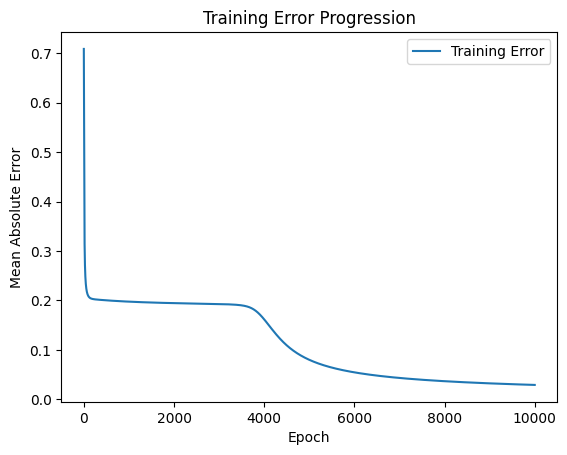

Predicted Outputs:  [1 0 0 0 0 0 0 0]
Actual Outputs:     [1 0 0 0 0 0 0 0]

Now training on Boolean function 3: bool_function_a


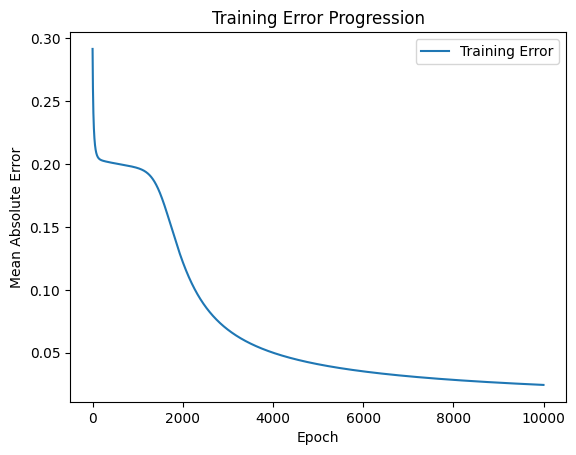

Predicted Outputs:  [0 1 1 1 1 1 1 1]
Actual Outputs:     [0 1 1 1 1 1 1 1]

Now training on Boolean function 4: bool_function_d


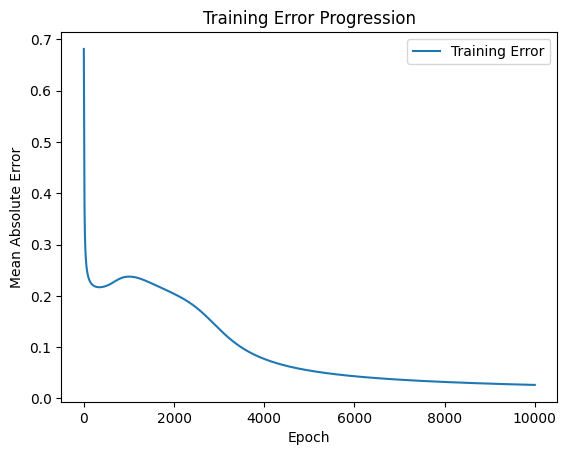

Predicted Outputs:  [0 0 0 0 0 0 0 1]
Actual Outputs:     [0 0 0 0 0 0 0 1]

Now training on Boolean function 5: bool_function_e


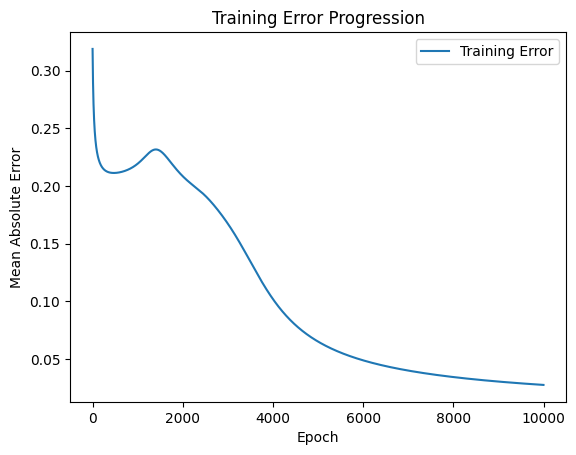

Predicted Outputs:  [1 1 1 1 1 1 1 0]
Actual Outputs:     [1 1 1 1 1 1 1 0]


In [32]:
# Define the list of Boolean functions for training and testing
bool_functions_list = [bool_function_b, bool_function_c, bool_function_a, bool_function_d, bool_function_e]

# Train and verify the neural network on each Boolean function
for idx, bool_fn in enumerate(bool_functions_list):
    print(f"\nNow training on Boolean function {idx + 1}: {bool_fn.__name__}")

    # Step 1: Prepare the training dataset
    X_train, y_train = prepare_dataset(bool_fn)

    # Step 2: Train the model on the dataset
    weights_input_hidden, weights_hidden_output = execute_training(X_train, y_train, max_epochs=10000)

    # Step 3: Predict outcomes on the training data
    predictions = make_nn_predictions(X_train, weights_input_hidden, weights_hidden_output)

    # Step 4: Display predicted and actual outcomes (in binary form)
    print("Predicted Outputs: ", predictions.flatten().astype(int))
    print("Actual Outputs:    ", y_train.flatten().astype(int))


## Q3. Rulkov Map Simulation of Neuronal Action Potentials

Rulkov map: It is a simple dynamical systems model that simulates neuronal action potentials.
This model combines a fast and a slow dynamical system. The equations governing the model are:

- $𝑥_{𝑛+1} = 𝑓(𝑥_𝑛, 𝑦_𝑛)$ \\
- $𝑦_{𝑛+1} = 𝑦_𝑛 − 𝜇 (𝑥_𝑛 + 1) + 𝜇𝜎$

where \( $f()$ \) is a discontinuous function defined as:

- $𝑓(𝑥, 𝑦) = 𝛼/(1 − 𝑥)+ 𝑦, 𝑥 ≤ 0 \\
 𝑓(𝑥, 𝑦) = 𝛼 + 𝑦, 0 < 𝑥 < 𝛼 + 𝑦 \\
 𝑓(𝑥, 𝑦) = −1, 𝑥 ≥ 𝛼 + 𝑦$ \\

This simulation will help us to visualize different modes of neuronal activity: bursting spikes, silence, and tonic spiking.


## Step 1: Define the Discontinuous Function

The function `discontinuous_function(x, y, alpha)` implements the piecewise function \( f(x, y) \) used in the Rulkov map.
It takes parameters \( x \), \( y \), and \( \alpha \) and returns the calculated value based on the defined conditions.


In [33]:
def discontinuous_function(x, y, alpha=4):
    """Define the discontinuous function f(x, y) for the Rulkov map."""
    if x <= 0:
        return alpha / (1 - x) + y
    elif x < alpha + y:
        return alpha + y
    else:
        return -1


## Step 2: Define the Rulkov Map Generator

The function `generate_rulkov_map` generates values for \( X \) and \( Y \) using the Rulkov map equations.
It initializes arrays for \( X \) and \( Y \) and iteratively calculates their values based on the discontinuous function and the equations provided.


In [34]:
def generate_rulkov_map(N=10**3, beta=0, sigma=1, mu=0.4, alpha=4):
    """Generates values for X and Y using the Rulkov map equations."""
    X = np.zeros(N)  # Initialize the X array
    Y = np.zeros(N)  # Initialize the Y array
    for i in range(N - 1):
        X[i + 1] = discontinuous_function(X[i], Y[i] + beta, alpha=alpha)
        Y[i + 1] = Y[i] - mu * (X[i] + 1) + mu * sigma
    return X, Y


## Step 4: Define the Plotting Function

The function `plot_neuronal_behavior` is used for plotting the neuronal activity \( X \) and recovery variable \( Y \) over time.
It takes the parameters for the simulation and generates two different plots: one for \( X \) and another for \( Y \).


In [35]:
def plot_neuronal_behavior(N, beta, sigma, mu, alpha, behavior_title):
    """Plot the neuronal activity (X) and recovery variable (Y) over time."""
    X, Y = generate_rulkov_map(N=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 1, 1)
    plt.plot(X, label='X (neuronal activity)', color='blue')
    plt.title(f'{behavior_title}: Neuronal Activity')
    plt.ylabel('X')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(Y, label='Y (recovery variable)', color='orange')
    plt.title(f'{behavior_title}: Recovery Variable')
    plt.ylabel('Y')
    plt.xlabel('Time Steps')
    plt.grid()

    plt.tight_layout()
    plt.show()


## Step 5: Visualizing Bursting Spikes

We will now simulate and visualize bursting spikes by setting specific parameter values for \( β \), \( σ \), \( μ \), and \( α \).


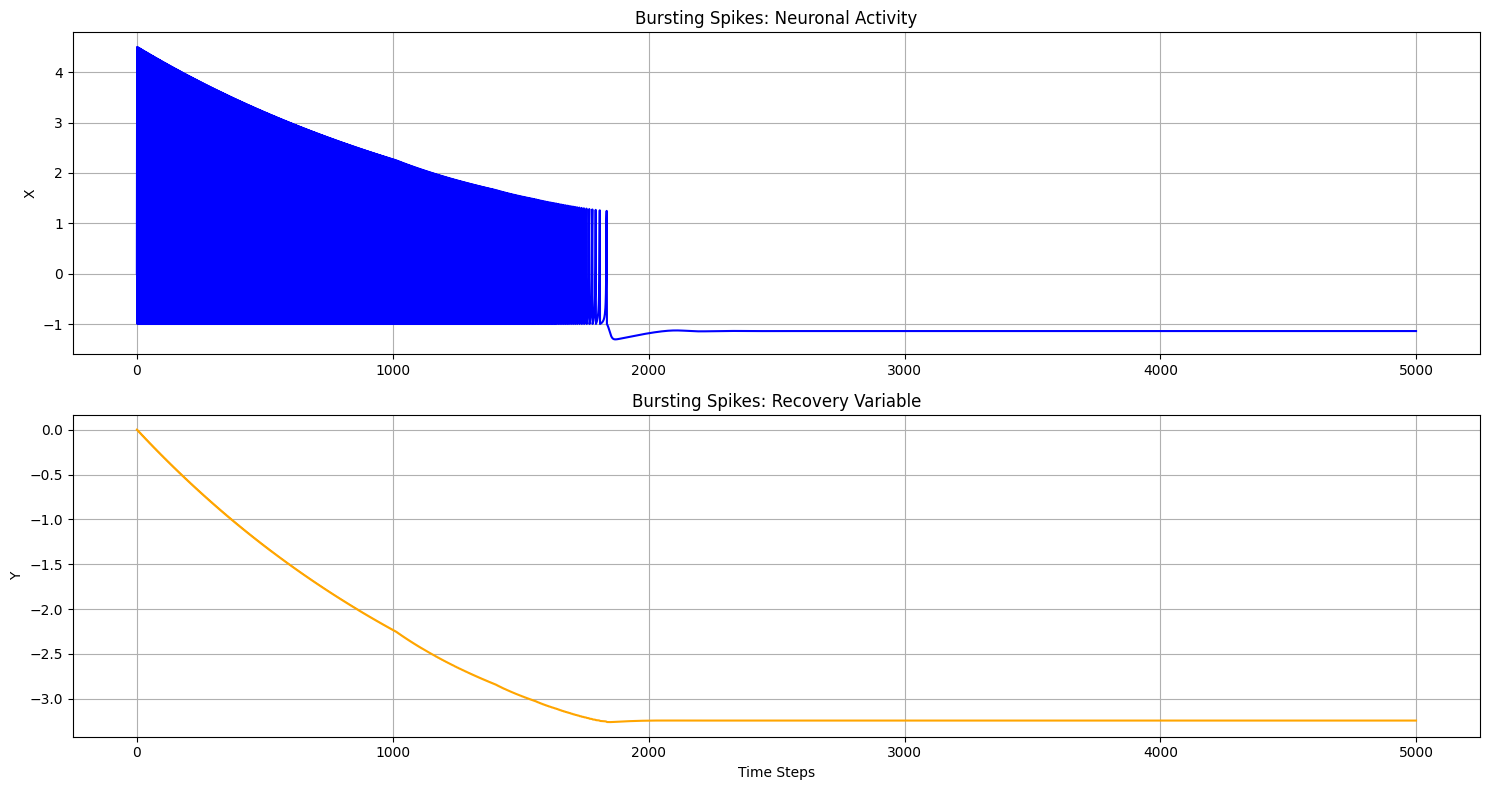

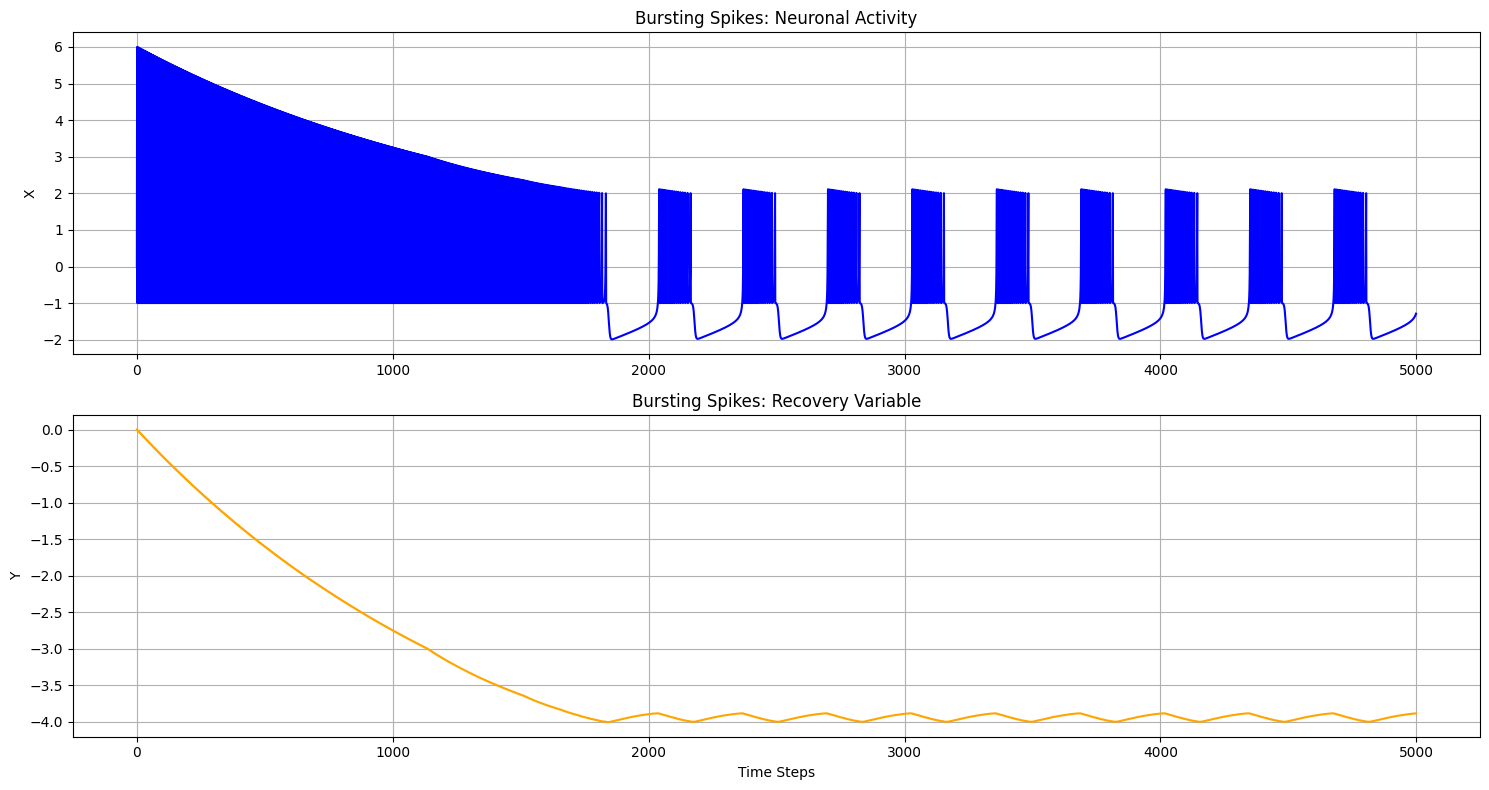

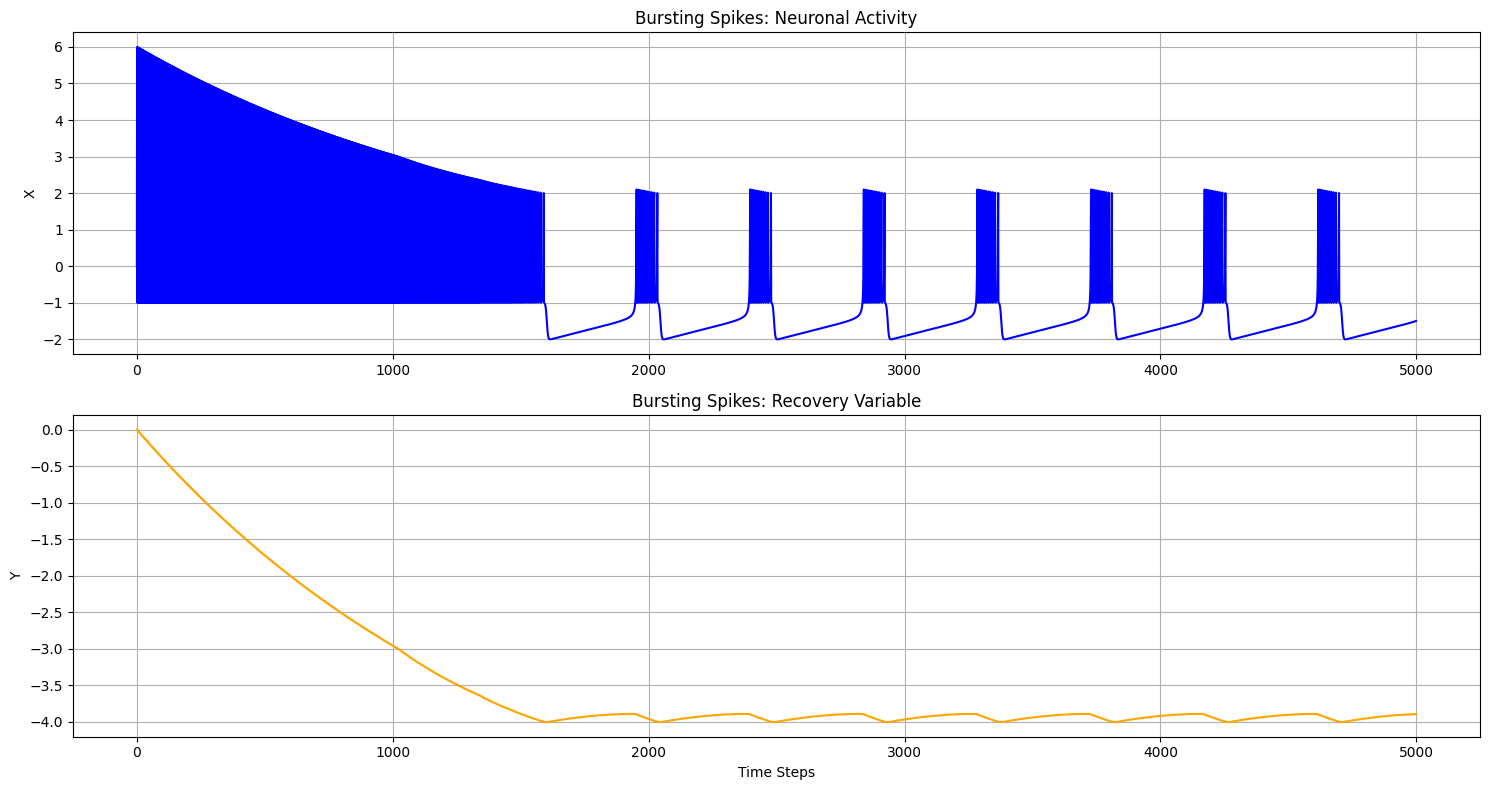

In [36]:
# Parameters for bursting spikes
N = 5 * 10**3
plot_neuronal_behavior(N, beta=0, sigma=-0.14, mu=0.001, alpha=4.5, behavior_title='Bursting Spikes')
plot_neuronal_behavior(N, beta=0, sigma=-0.1, mu=0.001, alpha=6, behavior_title='Bursting Spikes')
plot_neuronal_behavior(N, beta=0, sigma=-0.386, mu=0.001, alpha=6, behavior_title='Bursting Spikes')


## Step 6: Visualizing Silence

Now, we will try to simulate and visualize silence by changing the parameters appropriately.


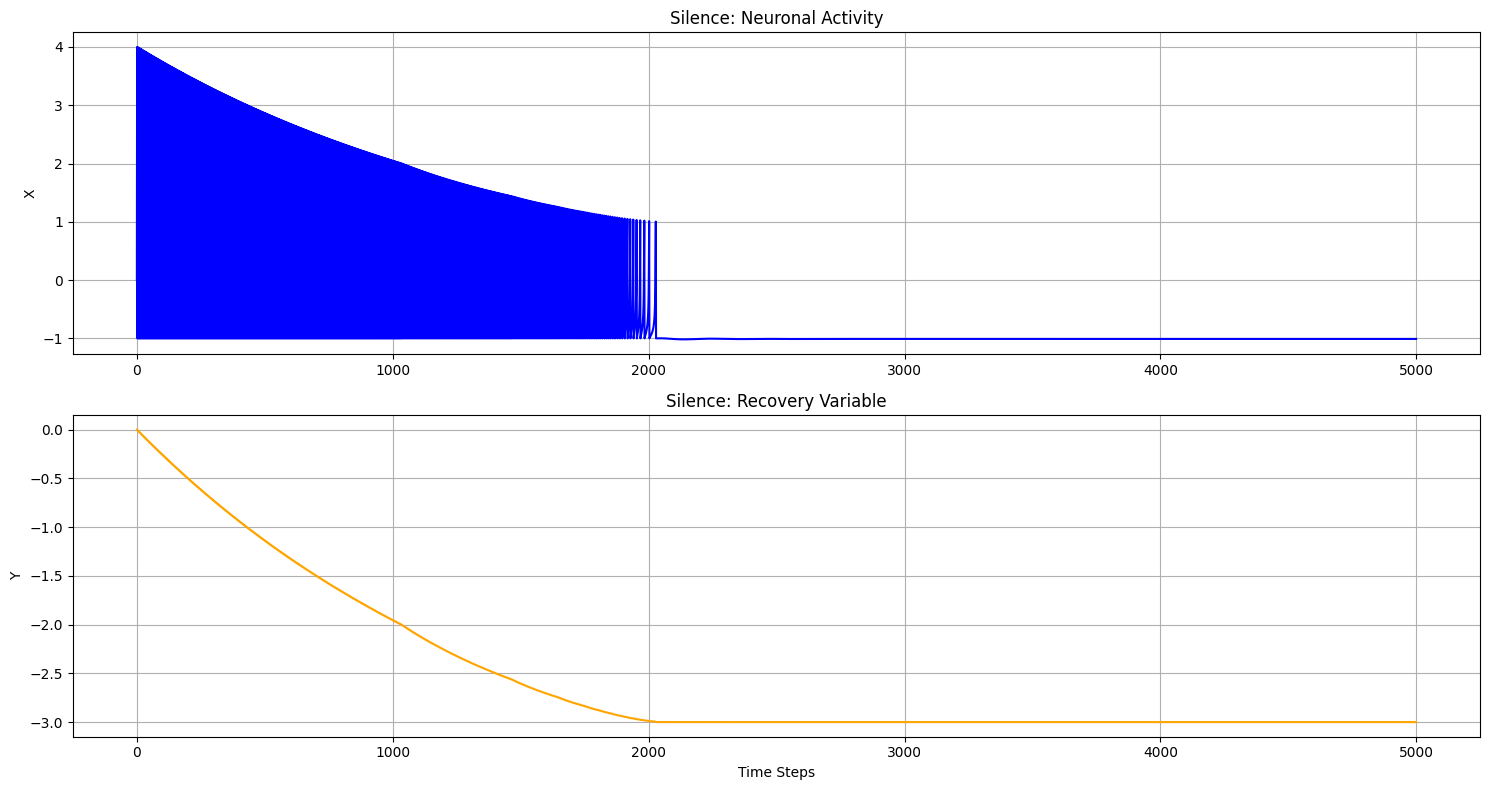

In [37]:
# Parameters for silence
plot_neuronal_behavior(N, beta=0, sigma=-0.01, mu=0.001, alpha=4, behavior_title='Silence')


## Step 7: Visualizing Tonic Spikes

Now, we will simulate and visualize tonic spiking behavior by changing the parameter values.


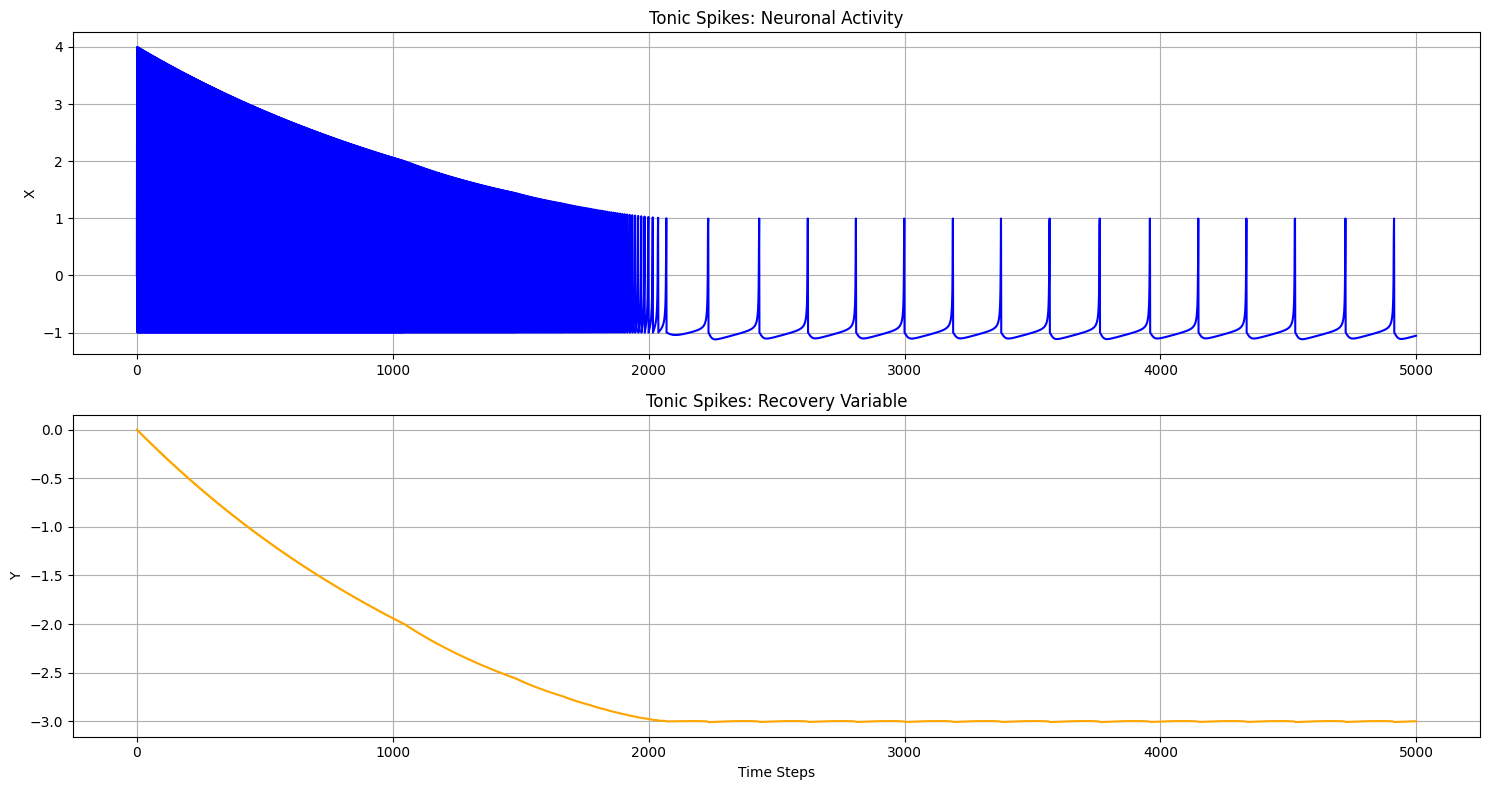

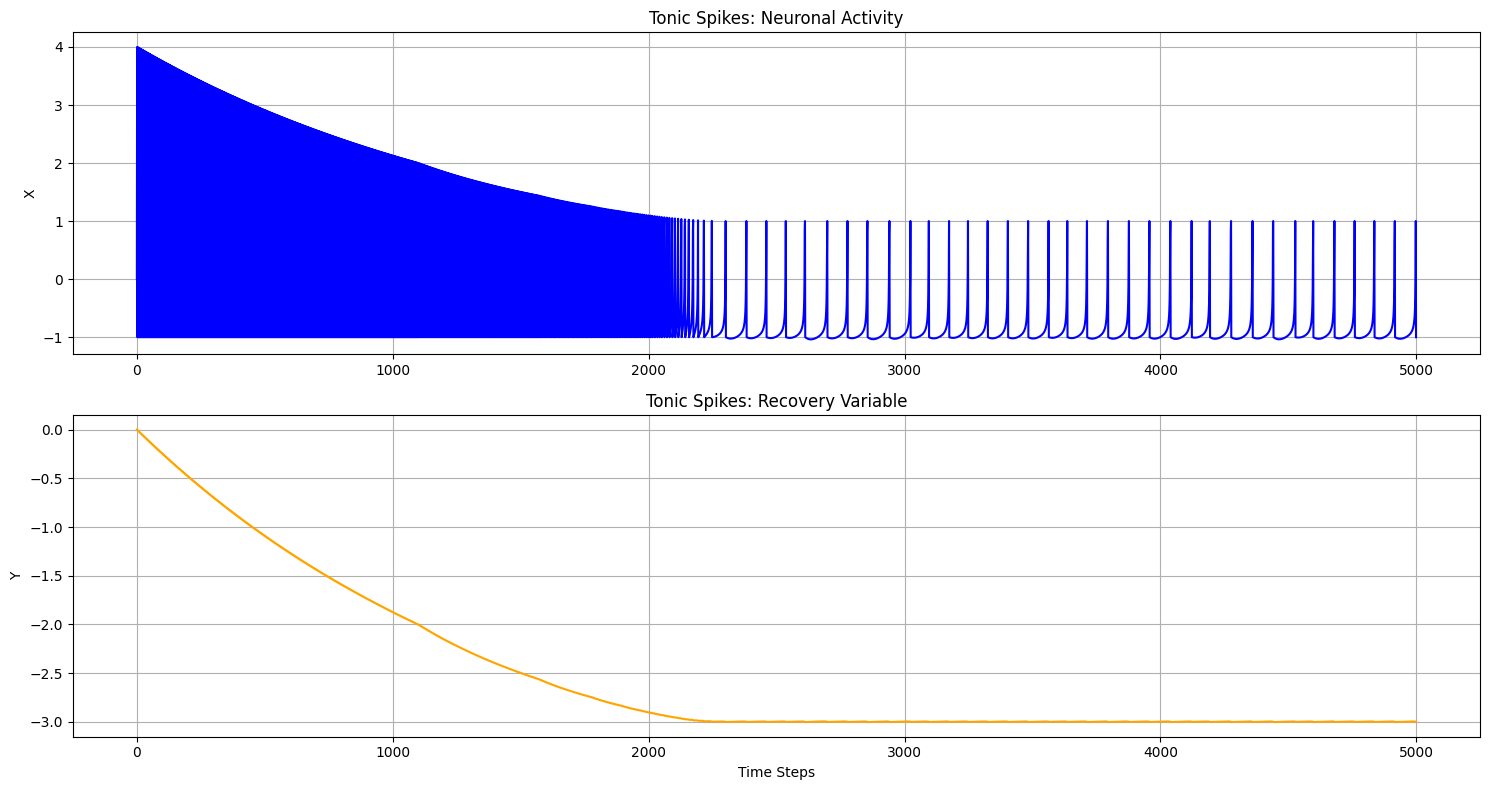

In [38]:
# Parameters for tonic spikes
plot_neuronal_behavior(N, beta=0, sigma=0.01, mu=0.001, alpha=4, behavior_title='Tonic Spikes')
plot_neuronal_behavior(N, beta=0, sigma=0.1, mu=0.001, alpha=4, behavior_title='Tonic Spikes')


### Summary of Parameter Values and Neuronal Behaviors
The following parameters were used to simulate different neuronal behaviors in the Rulkov model. Each behavior corresponds to a specific configuration of parameters.

- **Bursting Spikes:**
  - **Parameters:**
    - \( 𝛼 = 4.5 \)
    - \( 𝜇 = 0.001 \)
    - \( 𝜎 = -0.14 \) (and other variations: \( -0.1 \), \( -0.386 \))
  - **Description:** This configuration produces bursts of spikes, resembling certain neuronal activities where the neuron rapidly fires in bursts followed by silence.

- **Silence:**
  - **Parameters:**
    - \( 𝛼 = 4 \)
    - \( 𝜇 = 0.001 \)
    - \( 𝜎 = -0.01 \)
  - **Description:** With these parameters, the system exhibits periods of inactivity, showing minimal spiking behavior, effectively mimicking a resting state in neuronal activity.

- **Tonic Spiking:**
  - **Parameters:**
    - \( 𝛼 = 4 \)
    - \( 𝜇 = 0.001 \)
    - \( 𝜎 = 0.01 \) (and other variations: \( 0.1 \))
  - **Description:** This setup results in periodic firing, indicative of tonic spiking behavior in neurons, characterized by a consistent and rhythmic pattern of action potentials.


## Acknowledgement:

I am thankful to my peer Udbhav in this course who helped me in while coding and by sharing their results and discussing strategies for parameter tuning.

credits: https://github.com/ShivenTripathi/CS786-Computational-Cognitive-Science/tree/main/Assignments

## Q2

# Q2: Frozen Lake Q-learning Implementation
In this task, we aim to solve the frozen lake problem using Q-learning. The frozen lake is a grid-based environment where an agent navigates from the start position to the goal, avoiding holes. The grid can be of size NxN, and M holes are placed randomly.

## Part (a): Generate Random Frozen Lake Instance
We generate a frozen lake environment represented as an NxN grid where:
- "S" represents the start position
- "G" represents the goal
- "F" represents a frozen safe path
- "H" represents a hole

The function takes two parameters:
- N: Size of the lake (NxN)
- M: Number of holes (randomly placed)

The function ensures that the start and goal positions are not overwritten by holes.


S F F F F F
F F F H F F
F F F H H F
H H F F H F
F F F F F F
F H F H F G


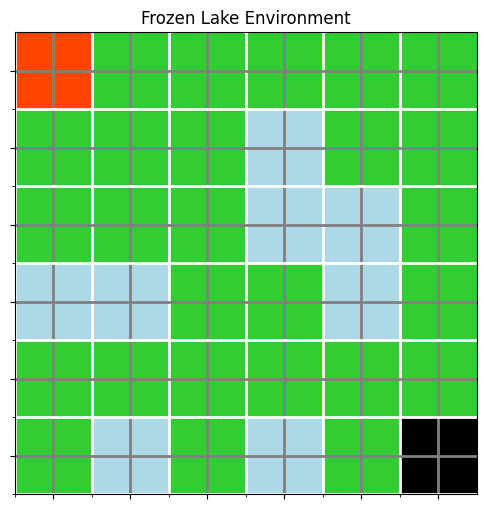

In [26]:


import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to generate a frozen lake environment with start, goal, and holes
def create_lake_env(size, num_holes):
    # Initialize an empty lake with frozen paths
    lake_map = [['F' for _ in range(size)] for _ in range(size)]

    # Set start (S) and goal (G) positions
    lake_map[0][0] = 'S'
    lake_map[size-1][size-1] = 'G'

    # Randomly place holes, avoiding start and goal positions
    hole_count = 0
    while hole_count < num_holes:
        row, col = random.randint(0, size-1), random.randint(0, size-1)
        if lake_map[row][col] == 'F' and (row, col) != (0, 0) and (row, col) != (size-1, size-1):
            lake_map[row][col] = 'H'
            hole_count += 1

    return lake_map

# Function to visualize the frozen lake using matplotlib
def visualize_lake(lake_map):
    size = len(lake_map)

    # Create a numeric representation of the lake map
    visual_map = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if lake_map[i][j] == 'S':
                visual_map[i][j] = 1  # Start
            elif lake_map[i][j] == 'G':
                visual_map[i][j] = 2  # Goal
            elif lake_map[i][j] == 'H':
                visual_map[i][j] = -1 # Hole
            else:
                visual_map[i][j] = 0  # Frozen path

    # Define colors: Blue (Frozen), Green (Start), Red (Goal), Black (Holes)
    cmap = ListedColormap(['#ADD8E6', '#32CD32', '#FF4500', '#000000'])

    # Create the plot
    plt.figure(figsize=(6, 6))
    plt.imshow(visual_map, cmap=cmap, origin='upper', extent=[0, size, 0, size])

    # Adding grid lines for better visibility
    plt.grid(True, which='both', color='gray', linestyle='-', linewidth=2)

    # Customize the ticks and gridlines
    plt.xticks(np.arange(0.5, size, 1), [])
    plt.yticks(np.arange(0.5, size, 1), [])
    plt.gca().set_xticks(np.arange(0, size, 1), minor=True)
    plt.gca().set_yticks(np.arange(0, size, 1), minor=True)
    plt.gca().grid(which='minor', color='white', linestyle='-', linewidth=2)

    # Display the lake environment
    plt.title('Frozen Lake Environment')
    plt.show()

# Create and visualize the lake environment
lake_size = 6
holes_num = 8
lake = create_lake_env(lake_size, holes_num)

# Print the lake for reference
for row in lake:
    print(' '.join(row))

# Visualize the lake using matplotlib
visualize_lake(lake)


## Part (b): Q-learning Algorithm for Frozen Lake
Q-learning is a reinforcement learning algorithm that enables the agent to learn optimal policies by interacting with the environment. We define:
- A learning rate (alpha) to control the weight of new knowledge
- A discount factor (gamma) to emphasize long-term rewards
- An exploration rate (epsilon) for the epsilon-greedy strategy to explore the environment

The lake environment can be modeled as a grid, where the agent can move up, down, left, or right. The agent receives rewards for reaching the goal and penalties for falling into holes.

The function returns the cumulative rewards obtained during each episode to assess the learning progress.


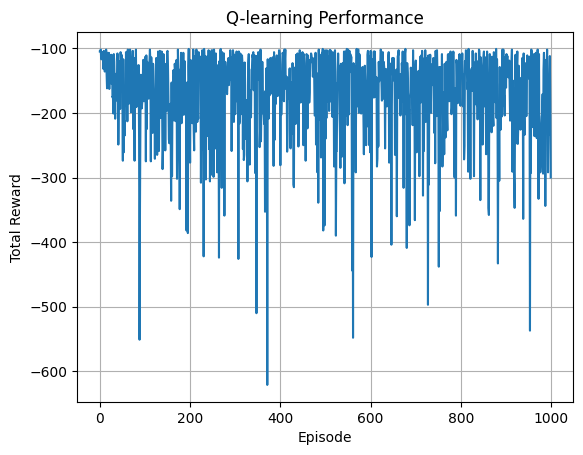

In [21]:
# Q-learning algorithm to find the optimal path through the lake
def q_learning_solver(lake_grid, episode_count=1000, lr=0.1, discount_factor=0.9, exploration_rate=0.1):
    N = len(lake_grid)
    actions = 4  # Actions: 0=up, 1=down, 2=left, 3=right
    Q_table = np.zeros((N * N, actions))  # Initialize Q-table
    episode_rewards = []

    for ep in range(episode_count):
        total_reward = 0
        current_state = 0  # Start at position (0,0)

        while True:
            # Convert 1D state index to 2D coordinates (row, col)
            x, y = divmod(current_state, N)

            # Epsilon-greedy action selection
            if random.uniform(0, 1) < exploration_rate:
                action = random.choice([0, 1, 2, 3])  # Explore random actions
            else:
                action = np.argmax(Q_table[current_state])  # Exploit known info

            # Compute next state based on action
            if action == 0:  # Move up
                next_x = max(x - 1, 0)
                next_y = y
            elif action == 1:  # Move down
                next_x = min(x + 1, N - 1)
                next_y = y
            elif action == 2:  # Move left
                next_x = x
                next_y = max(y - 1, 0)
            elif action == 3:  # Move right
                next_x = x
                next_y = min(y + 1, N - 1)

            next_state = next_x * N + next_y
            reward = -1  # Default penalty for taking a step

            # Check if the agent falls into a hole or reaches the goal
            if lake_grid[next_x][next_y] == 'G':
                reward = 100  # Reached the goal
                Q_table[current_state, action] += lr * (reward + discount_factor * np.max(Q_table[next_state]) - Q_table[current_state, action])
                total_reward += reward
                break
            elif lake_grid[next_x][next_y] == 'H':
                reward = -100  # Fell into a hole
                Q_table[current_state, action] += lr * (reward + discount_factor * np.max(Q_table[next_state]) - Q_table[current_state, action])
                total_reward += reward
                break
            else:
                Q_table[current_state, action] += lr * (reward + discount_factor * np.max(Q_table[next_state]) - Q_table[current_state, action])

            # Update state and reward
            current_state = next_state
            total_reward += reward

        episode_rewards.append(total_reward)

    return episode_rewards

# Running the Q-learning algorithm on the frozen lake
rewards_list = q_learning_solver(lake, episode_count=1000, lr=0.1, discount_factor=0.9, exploration_rate=0.1)

# Plot the learning progress
def plot_learning_curve(rewards_list):
    plt.plot(rewards_list)
    plt.title('Q-learning Performance')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.grid(True)
    plt.show()

plot_learning_curve(rewards_list)


## Part (c): Investigating the Effect of Learning Parameters (Alpha and Gamma)
To understand how the learning rate (α) and discount factor (γ) affect the performance of the Q-learning algorithm, we experiment with different values for these parameters.

We test the performance by running the Q-learning algorithm with combinations of α and γ, and plot the learning curve for each.


Testing Q-learning with alpha=0.1, gamma=0.1


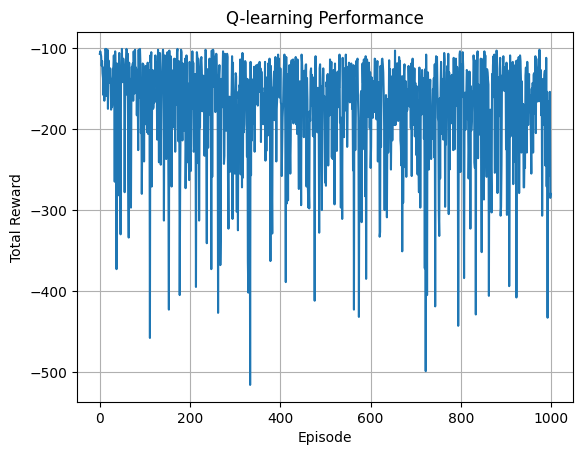

Testing Q-learning with alpha=0.1, gamma=0.5


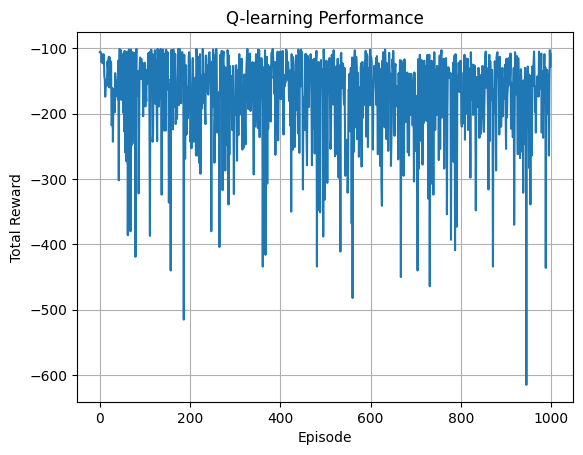

Testing Q-learning with alpha=0.1, gamma=0.9


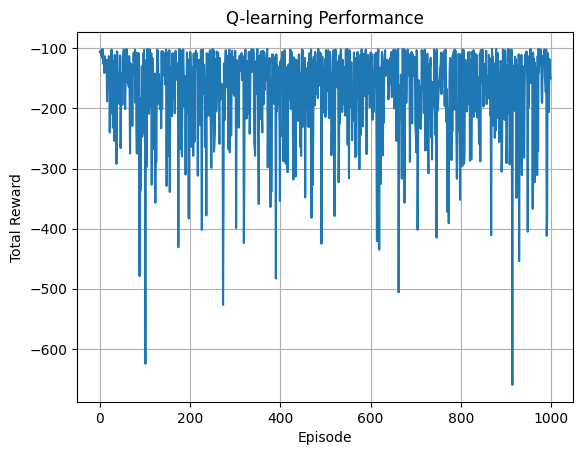

Testing Q-learning with alpha=0.5, gamma=0.1


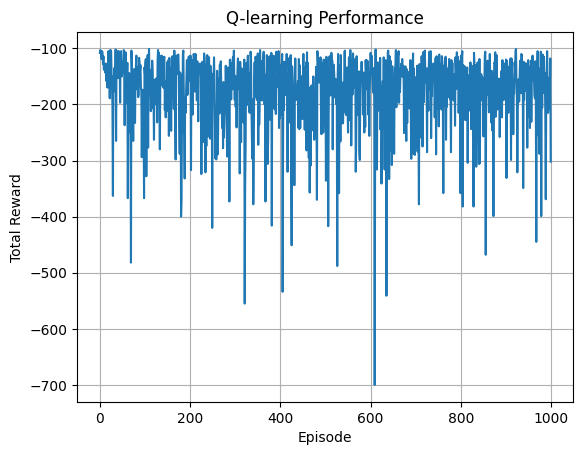

Testing Q-learning with alpha=0.5, gamma=0.5


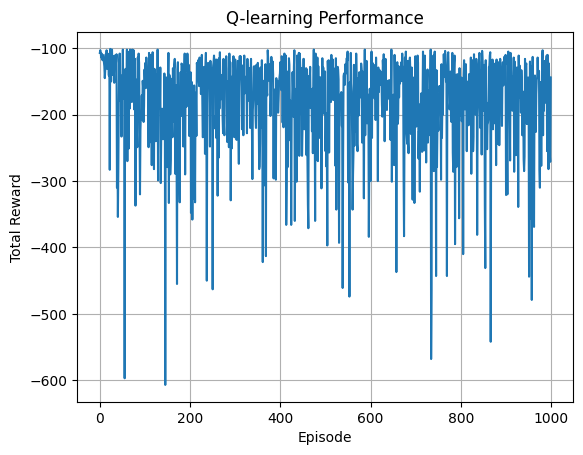

Testing Q-learning with alpha=0.5, gamma=0.9


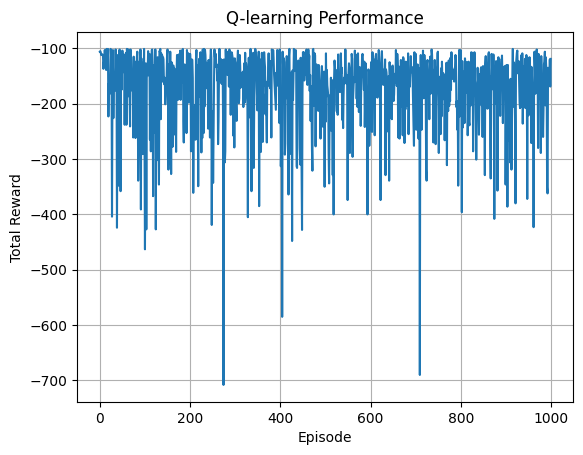

Testing Q-learning with alpha=0.9, gamma=0.1


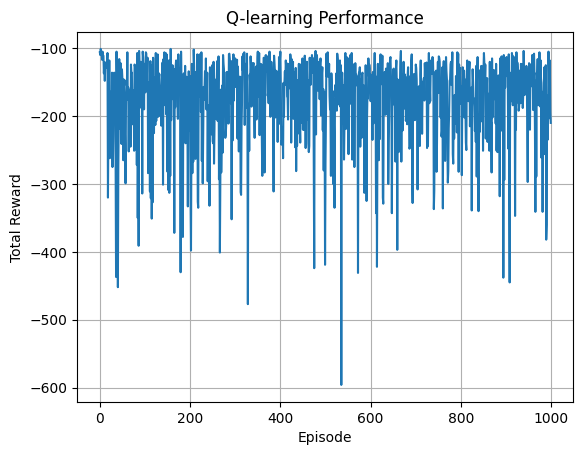

Testing Q-learning with alpha=0.9, gamma=0.5


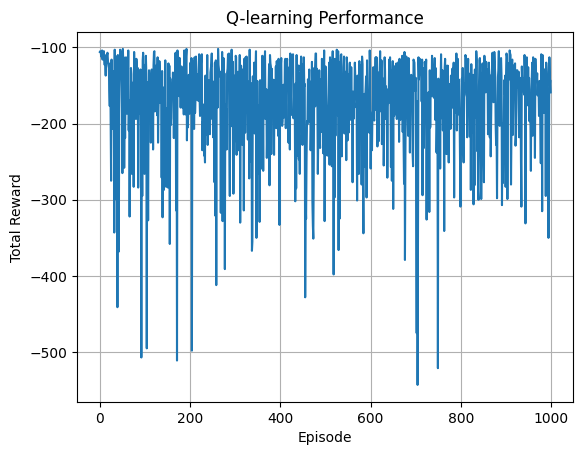

Testing Q-learning with alpha=0.9, gamma=0.9


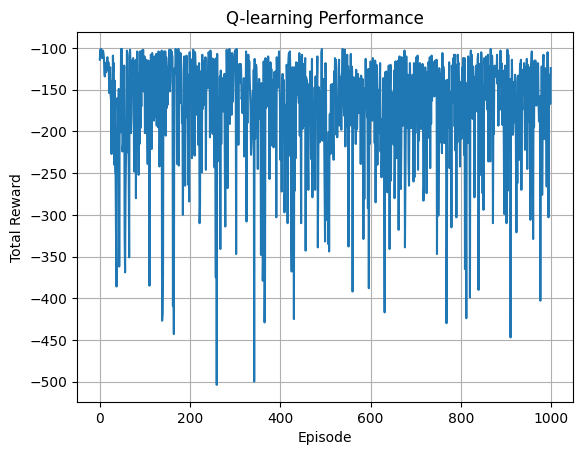

In [22]:
learning_rates = [0.1, 0.5, 0.9]
discount_factors = [0.1, 0.5, 0.9]

for lr in learning_rates:
    for gamma in discount_factors:
        print(f"Testing Q-learning with alpha={lr}, gamma={gamma}")
        rewards_list = q_learning_solver(lake, episode_count=1000, lr=lr, discount_factor=gamma, exploration_rate=0.1)
        plot_learning_curve(rewards_list)


## Part (d): Effect of Lake Size (N) and Number of Holes (M)
We now explore how the size of the lake (N) and the number of holes (M) impact the performance of the Q-learning algorithm. Larger lakes or more holes increase the complexity of the environment, making it harder for the agent to reach the goal.

We test the algorithm for varying lake sizes and numbers of holes and plot the learning curves for each combination.

To improve execution time, we reduce the number of episodes and make sure the Q-learning agent efficiently utilizes the environment.



KeyboardInterrupt: 

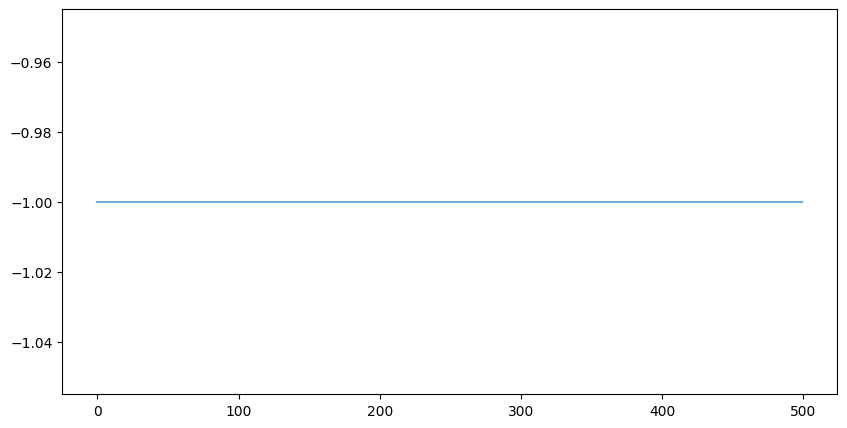

In [28]:
def optimized_run_q_learning(lake, N, M, episodes=500, alpha=0.1, gamma=0.99, epsilon=0.1):
    agent = QLearningAgent(N, alpha, gamma, epsilon)
    total_rewards = []

    for episode in range(episodes):
        position = (0, 0)  # Start at the top-left
        total_reward = 0

        while True:
            state = agent.get_state(position)
            action = agent.choose_action(state)
            next_position = agent.move(position, action)
            next_state = agent.get_state(next_position)

            if lake[next_position[0]][next_position[1]] == 'G':
                reward = 1
                agent.update_q_value(state, action, reward, next_state)
                total_reward += reward
                break
            elif lake[next_position[0]][next_position[1]] == 'H':
                reward = -1
                agent.update_q_value(state, action, reward, next_state)
                total_reward += reward
                break
            else:
                reward = 0
                agent.update_q_value(state, action, reward, next_state)

            position = next_position

        total_rewards.append(total_reward)

    return total_rewards

def plot_lake_size_effect(N_values, M_values, episodes=500, alpha=0.1, gamma=0.99):
    plt.figure(figsize=(10, 5))

    for N in N_values:
        for M in M_values:
            lake = generate_lake(N, M)
            rewards = optimized_run_q_learning(lake, N, M, episodes, alpha, gamma)
            plt.plot(range(episodes), rewards, label=f'N={N}, M={M}', alpha=0.6)

    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.title('Learning performance with different lake sizes and hole counts (Optimized)')
    plt.grid(True)
    plt.show()

# Example: vary N and M
N_values = [4, 5, 6]  # Smaller lake sizes for quicker execution
M_values = [3, 4, 5]  # Fewer holes to reduce complexity
plot_lake_size_effect(N_values, M_values)
